In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
csv = pd.read_csv('7FCMN16rmsprop_lr0.0001_prep_keras_dp0.001_ep125_postprocessing.csv')

In [18]:
csv['model_name'].unique()

array(['7FCMN16rmsprop_lr0.0001_prep_keras_dp0.001_ep125.h5'],
      dtype=object)

In [19]:
threshold_list = csv['threshold'].unique()
nan_list = []
for threshold in threshold_list:
    th_extracted = csv.loc[csv['threshold'] == threshold,:]
    nan_list.append(th_extracted.loc[th_extracted['buds_predicted'] == 0,:].shape[0])

[0.9256198347107438,
 0.9652173913043478,
 0.9732142857142857,
 0.981651376146789,
 0.9813084112149533,
 0.9811320754716981,
 0.9809523809523809,
 0.9903846153846154,
 0.9903846153846154]

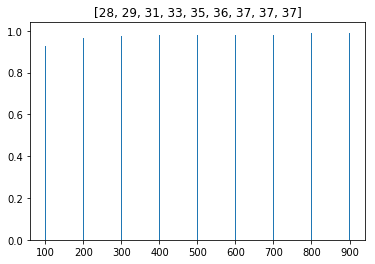

In [20]:
threshold_list = csv['threshold'].unique()

prec_list = []

for th in threshold_list:
    th_extracted = csv.loc[csv['threshold'] == th,:]
    true_positives = th_extracted.loc[th_extracted['buds_predicted']>=1,:].shape[0]
    false_positives = th_extracted['buds_predicted'].sum() - true_positives
    prec_list.append(true_positives / (true_positives + false_positives))
    
plt.bar(x=threshold_list, height=prec_list)
plt.title(nan_list);
prec_list

[0.7878787878787878,
 0.7867647058823529,
 0.7737226277372263,
 0.7608695652173914,
 0.7463768115942029,
 0.7391304347826086,
 0.7318840579710145,
 0.7338129496402878,
 0.7338129496402878]

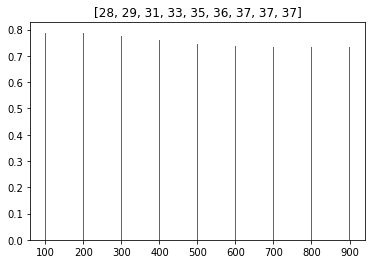

In [21]:
threshold_list = csv['threshold'].unique()
rec_list = []
for threshold in threshold_list:
    th_extracted = csv.loc[csv['threshold'] == threshold,:]
    #aquellos patches en los que se predijo una yema
    true_positives = th_extracted.loc[th_extracted['buds_predicted']==1,:].shape[0] 
    # aquellos en los que no se predijeron ninguna
    false_negatives = th_extracted.loc[th_extracted['buds_predicted']==0,:].shape[0] 
    rec_list.append(true_positives / (true_positives + false_negatives))
plt.bar(x=threshold_list, height=rec_list, align='center',tick_label=threshold_list)
plt.title(nan_list);
rec_list

IndexError: tuple index out of range

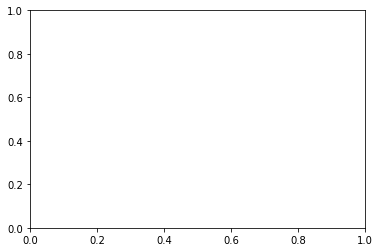

In [29]:
fig, ax = plt.subplots()
for th in threshold_list:
    ax.scatter(rec_list, prec_list, c=th, label=th)
ax.legend()
ax.grid(True)
plt.show()

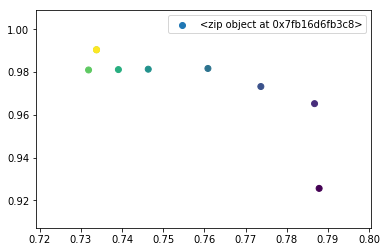

In [27]:
plt.scatter(rec_list, prec_list, c=threshold_list, label=zip(threshold_list, threshold_list))
plt.legend()